In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# ucitavamo recipes data set
recipes = pd.read_csv("recipes.csv")
recipes.head()

,Unnamed: 0,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,...,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
0,450,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
1,11584,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
2,4645,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
3,11074,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
4,4783,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,greek


# Analiza data seta

In [3]:
# pre svega proveravamo da li ima nekih nedostajucih vrednosti
recipes.isna().sum().sum()

0

In [4]:
# uzorci i obelezja
recipes.shape

(10566, 152)

In [5]:
# Kojim obelezjima raspolazemo ?
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10566 entries, 0 to 10565
Columns: 152 entries, Unnamed: 0 to country
dtypes: float64(150), int64(1), object(1)
memory usage: 12.3+ MB


In [6]:
# Mozemo primetiti da nam kolona 'Unnamed: 0' i nije od velikog znacaja, jer za svaki uzorak ima drugaciju vrednost.
# Iz toga sledi da je mozemo obrisati.
recipes = recipes.loc[:,~recipes.columns.str.match("Unnamed")]

In [7]:
# nemamo neke pogodnosti od ove funkcije jer je ipak kompletan dataframe ispunjen samo nulama i jedinicama
recipes.describe()

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,...,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
count,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,...,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000
mean,0.592466,0.455328,0.414726,0.299451,0.337971,0.279292,0.300587,0.254779,0.263013,0.230456,...,0.037005,0.024134,0.022998,0.024702,0.023945,0.024418,0.023755,0.029434,0.028204,0.022904
std,0.491399,0.498024,0.492698,0.458039,0.473041,0.448673,0.458535,0.435758,0.440290,0.421145,...,0.188784,0.153472,0.149905,0.155222,0.152884,0.154350,0.152294,0.169028,0.165562,0.149603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# # Odabrana je nekolicina obelezja; mozemo videti da u principu obelezja nisu u korelaciji
# sn.set()
# sn.pairplot(recipes[['salt','oil','garlic','pepper','sugar','butter','sauce','olive oil','onions','water','broth','zucchini','mirin','tomato paste','chicken breasts','peanut oil','yellow onion','fillets','lettuce','mayonaise']], height = 2.5)
# plt.show();

In [9]:
country_gb = recipes.groupby('country').sum()
country_gb

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,...,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
country,,,,,,,,,,,,,,,,,,,,,
british,342.0,124.0,74.0,118.0,244.0,307.0,60.0,56.0,122.0,118.0,...,20.0,2.0,0.0,14.0,1.0,1.0,13.0,19.0,2.0,5.0
chinese,581.0,749.0,783.0,418.0,660.0,59.0,1098.0,79.0,540.0,494.0,...,40.0,19.0,12.0,14.0,58.0,133.0,24.0,19.0,44.0,7.0
french,982.0,611.0,508.0,359.0,509.0,707.0,56.0,508.0,300.0,363.0,...,100.0,53.0,1.0,52.0,12.0,4.0,32.0,86.0,37.0,34.0
greek,369.0,399.0,307.0,209.0,54.0,73.0,24.0,376.0,129.0,77.0,...,12.0,28.0,0.0,18.0,11.0,0.0,8.0,7.0,45.0,9.0
italian,1006.0,1069.0,910.0,554.0,255.0,380.0,280.0,1002.0,346.0,306.0,...,78.0,75.0,0.0,98.0,28.0,0.0,35.0,56.0,13.0,7.0
japanese,345.0,339.0,204.0,113.0,348.0,66.0,482.0,43.0,225.0,256.0,...,20.0,7.0,229.0,7.0,11.0,15.0,12.0,50.0,4.0,32.0
mexican,759.0,552.0,649.0,465.0,131.0,118.0,310.0,325.0,482.0,221.0,...,53.0,39.0,0.0,35.0,67.0,8.0,65.0,18.0,94.0,30.0
southern_us,1667.0,644.0,587.0,779.0,1052.0,1145.0,383.0,251.0,425.0,456.0,...,49.0,10.0,0.0,19.0,25.0,49.0,46.0,36.0,26.0,110.0
thai,209.0,324.0,360.0,149.0,318.0,96.0,483.0,52.0,210.0,144.0,...,19.0,22.0,1.0,4.0,40.0,48.0,16.0,20.0,33.0,8.0


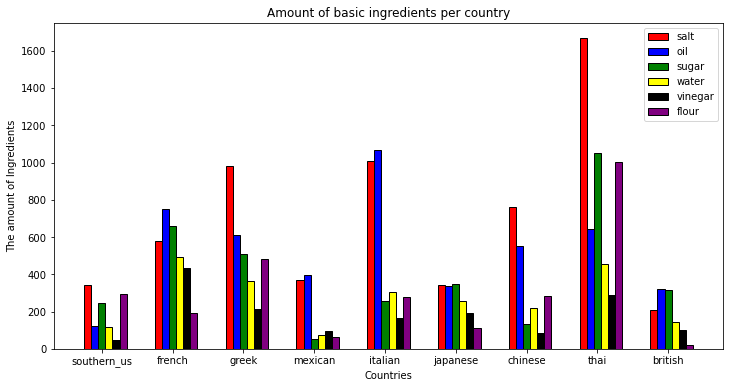

In [10]:
# Provericemo da li ima razlike u konzumaciji nekoliko osnovnih namirnica za pripremanje hrane: 
# salt, oil, sugar, water, vinegar, flour
# Zakljucak:
# Primecujemo da se osnovne namirnice u southern_us jako slabo konzumiraju. Moguc razlog je taj da je
# zastupljena preradjena vestacka hrana, fastfood itd... a pored toga retko ko ima vremena da sprema sve od pocetka.
# Samim tim ce se kupovati delom gotovi proizvodi pa recept niko nece poceti od osnovnih sastojaka.
# Italijanski recepti imaju mnogo vecu upotrebu soli i ulja. Najverovatnije jer je u njihovoj kuhinji tradicionalno 
# zastupljena testenina u svim oblicima i kombinacijama koja zahteva ulje i so u pripremi. Vidimo da je obicno belo brasno 
# slabo kotirano na grafiku, a i ono se koristi u pripremi za testenine. Razlog za to je sto italijani koriste
# specijalnu vrstu brasna za testenine, koje se razlikuje od obicnog belog. (nazivaju ga brasno tipa "00" i primer je 
# AGUGIARO & FIGNA MOLINI brasno)
# Japanska kihinja je uglavnom bazirana na morskim plodovima, pirincu itd... tako da ove namirnice nisu mnogo koriscene
# sto i mozemo primetiti na grafiku.
# U tajlandskim receptima su sve namirnice dosta zastupljene.Moze biti razlog to sto je Tajland jedna od siromasnijih 
# zemalja i najjeftinije je priustiti one osnovne namirnice od kojih ce se proizvoditi hrana.
n=9
r = np.arange(n)
width = 0.10
plt.figure(figsize=(12,6))
plt.bar(r - 0.2, country_gb['salt'], color = 'red',width = width, edgecolor = 'black', label='salt')
plt.bar(r - 0.1 , country_gb['oil'], color = 'blue',width = width, edgecolor = 'black',label='oil')
plt.bar(r       , country_gb['sugar'], color = 'green',width = width, edgecolor = 'black', label='sugar')
plt.bar(r + 0.1, country_gb['water'], color = 'yellow',width = width, edgecolor = 'black',label='water')
plt.bar(r + 0.2, country_gb['vinegar'], color = 'black',width = width, edgecolor = 'black', label='vinegar')
plt.bar(r + 0.3, country_gb['flour'], color = 'purple',width = width, edgecolor = 'black', label='flour')

plt.xlabel("Countries")
plt.ylabel("The amount of Ingredients")
plt.title("Amount of basic ingredients per country")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['southern_us', 'french', 'greek', 'mexican', 'italian', 'japanese','chinese', 'thai', 'british'])
plt.legend()
plt.show()

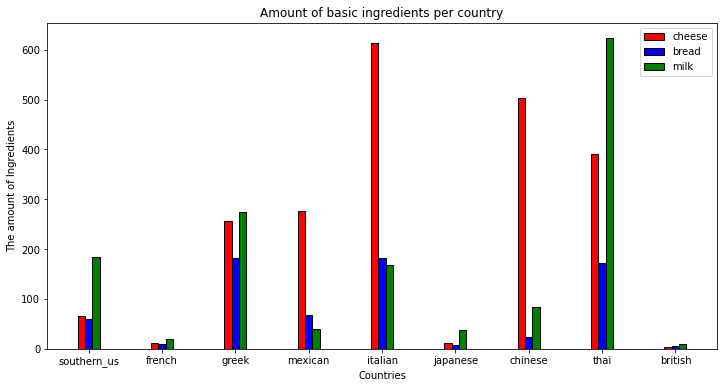

In [11]:
n=9
r = np.arange(n)
width = 0.10
plt.figure(figsize=(12,6))
plt.bar(r - 0.1, country_gb['cheese'], color = 'red',width = width, edgecolor = 'black', label='cheese')
plt.bar(r      , country_gb['bread'], color = 'blue',width = width, edgecolor = 'black',label='bread')
plt.bar(r + 0.1, country_gb['milk'], color = 'green',width = width, edgecolor = 'black', label='milk')

plt.xlabel("Countries")
plt.ylabel("The amount of Ingredients")
plt.title("Amount of basic ingredients per country")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['southern_us', 'french', 'greek', 'mexican', 'italian', 'japanese','chinese', 'thai', 'british'])
plt.legend()
plt.show()

##### Koje namirnice su najkoriscenije u receptima, po drzavama

Za recepte iz drzave:  british


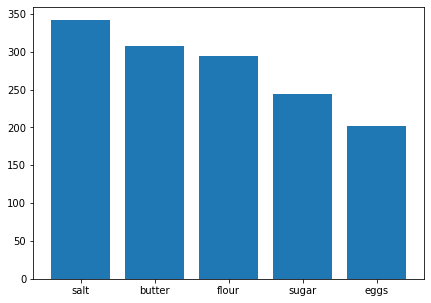

Za recepte iz drzave:  chinese


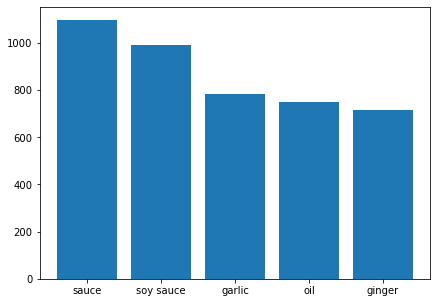

Za recepte iz drzave:  french


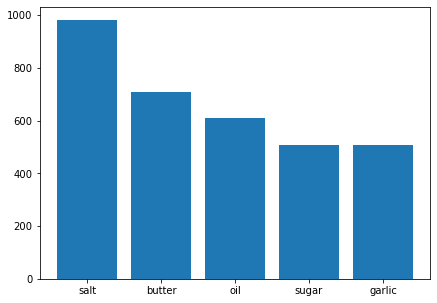

Za recepte iz drzave:  greek


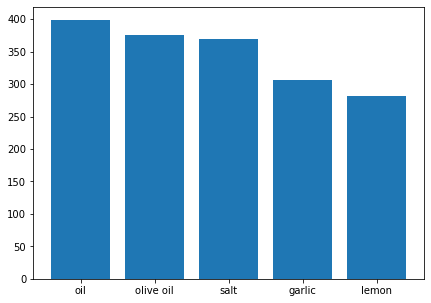

Za recepte iz drzave:  italian


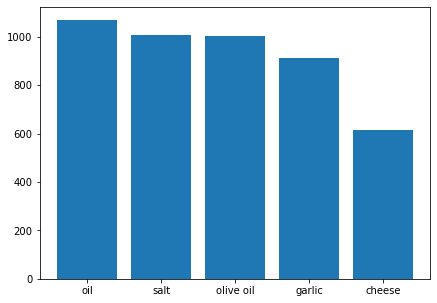

Za recepte iz drzave:  japanese


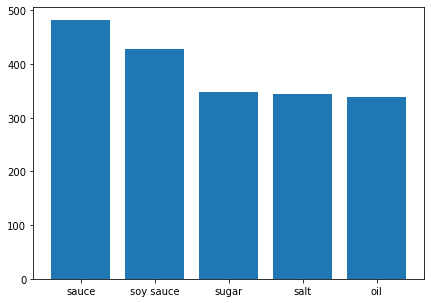

Za recepte iz drzave:  mexican


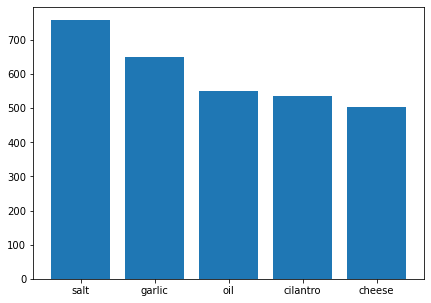

Za recepte iz drzave:  southern_us


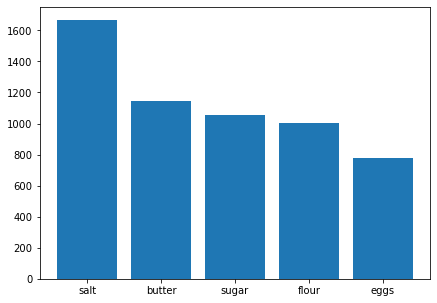

Za recepte iz drzave:  thai


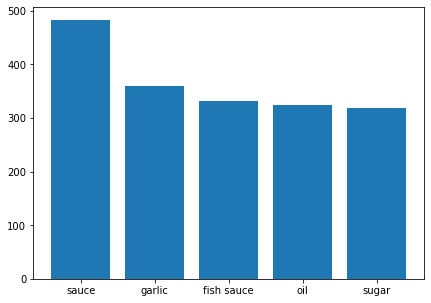

In [12]:
# Prikazuje nam za svaku drzavu 5 najkoriscenijih namirnica u njihovim receptima
for i in list(range(0, 9)):
    plt.figure(figsize =(7, 5))
    print("Za recepte iz drzave: ", country_gb.index[i])  
    dataframe = pd.DataFrame(country_gb.iloc[i,:].to_numpy(), 
                 index = recipes.loc[:, recipes.columns != 'country'].columns, 
                 columns = ['values']).sort_values(by = 'values', ascending = False).head()
    plt.bar(dataframe.index, dataframe['values'])
    plt.show()

In [13]:
# delimo skup tako da poslednju kolonu prebacujemo u y, a ostatak dataframea u X
X = recipes.iloc[:, :-1]
y = recipes.iloc[:, -1]

In [14]:
# proveravamo balansiranost data set-a
print('Oznake klasa su: ', y.unique())
print('Uzoraka u klasi SOUTH_US ima: ', sum(y=='southern_us'))
print('Uzoraka u klasi FRANCE   ima: ', sum(y=='french'))
print('Uzoraka u klasi GREECE   ima: ', sum(y=='greek'))
print('Uzoraka u klasi MEXICO   ima: ', sum(y=='mexican'))
print('Uzoraka u klasi ITALY    ima: ', sum(y=='italian'))
print('Uzoraka u klasi JAPAN    ima: ', sum(y=='japanese'))
print('Uzoraka u klasi CHINA    ima: ', sum(y=='chinese'))
print('Uzoraka u klasi THAILAND ima: ', sum(y=='thai'))
print('Uzoraka u klasi BRITAIN  ima: ', sum(y=='british'))

Oznake klasa su:  ['southern_us' 'french' 'greek' 'mexican' 'italian' 'japanese' 'chinese'
 'thai' 'british']
Uzoraka u klasi SOUTH_US ima:  2303
Uzoraka u klasi FRANCE   ima:  1565
Uzoraka u klasi GREECE   ima:  587
Uzoraka u klasi MEXICO   ima:  1274
Uzoraka u klasi ITALY    ima:  1670
Uzoraka u klasi JAPAN    ima:  755
Uzoraka u klasi CHINA    ima:  1291
Uzoraka u klasi THAILAND ima:  612
Uzoraka u klasi BRITAIN  ima:  509


<BarContainer object of 9 artists>

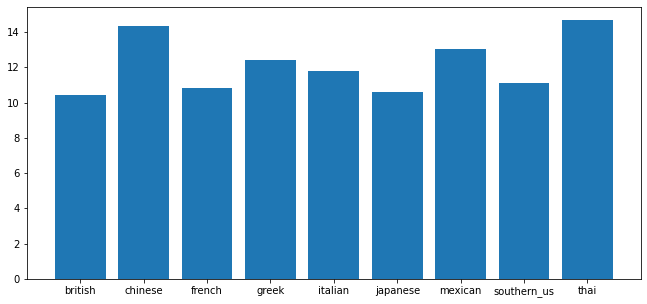

In [15]:
# primecujemo da najvise zacina po jednom receptu koriste kinezi, tajlandjani i meksikanci
plt.figure(figsize =(11, 5))
countries = ['british', 'chinese', 'french', 'greek', 'italian', 'japanese', 'mexican', 'southern_us', 'thai']
average_ingreds = []
for country in countries:
    average_ingreds.append(country_gb[country_gb.index == country].sum().sum()/ sum(y==country))
average_ingreds
plt.bar(countries, average_ingreds)

# Funkcija evaluacije

In [16]:
# funkcija koja sabira sve vrednosti osim redova i kolona koje su na zadatoj poziciji (racuna TN zaa drzave)
# ovo je potrebno za izracunavanje true-negativ-aa jer u slucaju multiclass problema, TN je zbir svih vrednosti
# koje nisu u koloni i redu u kom je TP
def TN_calculation(conf_mat, position): 
    s = 0; 
    for i in range(0, len(conf_mat)): #<-- len(matrix) uzima visinu matrice 
        for j in range(0, len(conf_mat[0])): #<-- len(matrix[0]) uzima sirinu matrice 
            if i != position and j != position: 
                s = s + conf_mat[i, j] 
    return s

In [17]:
# funkcija koja racuna FN za drzave 
def FN_calculation(conf_mat, position):
    country_FN = 0
    for col in list(range(9)):
        country_FN = country_FN + conf_mat[position, col] 
    country_FN = country_FN - conf_mat[position, position]
    return country_FN

In [18]:
# funkcija koja racuna FP za drzave
def FP_calculation(conf_mat, position):
    country_FP = 0
    for row in list(range(9)):
        country_FP = country_FP + conf_mat[row, position] 
    country_FP = country_FP - conf_mat[position, position]
    return country_FP

In [19]:
# funkcija koja ce da izracuna binarnu matricu konfuzije za svaku klasu pojedinacno na sledeci nacin:
# TP: je vrednost gde se ista klasa preklapa u redu i koloni, odnosno na glavnoj dijagonali.
# FP: predstavlja vrednost koja se dobija deljenjem TP sa vrednostima iz kolone u kojoj se TP nalazi
# FN: predstavlja vrednost koja se dobija deljenjem TP sa vrednostima iz reda u kojem se TP nalazi
# TN: je vrednost koja se dobija sumom svih vrednosti koje nisu u koloni i redu u kojoj je TP
def evaluation_classif(conf_mat):
    country_names = ['british', 'chinese', 'french', 'greek', 'italian', 'japanese', 'mexican', 'southern_us', 'thai']
    for i in list(range(len(conf_mat[0]))):
        print(country_names[i] + '_TP: ', conf_mat[i, i])    
        print(country_names[i] + '_TN: ', TN_calculation(conf_mat, i))
        print(country_names[i] + '_FN: ', FN_calculation(conf_mat, i))
        print(country_names[i] + '_FP: ', FP_calculation(conf_mat, i))
        
        total = 0; 
        total = conf_mat[i, i]+TN_calculation(conf_mat, i)+FP_calculation(conf_mat, i)+FN_calculation(conf_mat, i)
        print(country_names[i] + ' precision: ', (conf_mat[i, i]) / (conf_mat[i, i] + FP_calculation(conf_mat, i)))
        print(country_names[i] + ' accuracy: ', (conf_mat[i, i] + TN_calculation(conf_mat, i)) / total)
        print(country_names[i] + ' sensitivity: ', (conf_mat[i, i]) / (conf_mat[i, i] + FN_calculation(conf_mat, i)))
        print(country_names[i] + ' specificity: ', (TN_calculation(conf_mat, i)) / (FP_calculation(conf_mat, i) + TN_calculation(conf_mat, i)))
        
        precision = (conf_mat[i, i]) / (conf_mat[i, i] + FP_calculation(conf_mat, i))
        sensitivity = (conf_mat[i, i]) / (conf_mat[i, i] + FN_calculation(conf_mat, i))
        print(country_names[i] + ' F score: ', (2*precision*sensitivity) / (precision + sensitivity))
        print('-----------------------------------------')

In [20]:
# podela skupa na trening i test skup
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=46)

# KNN klasifikacija sa unakrsnom validacijom

##### Trazenje optimalnih parametara

In [21]:
# # Ova sekcija je zakomentarisana jer treba mnogo vremena da da rezultat. Zbog toga su u celiji ispod ove
# # formirane liste sa vrednostima koje su dobijene pokretanjem ove celije kako bih sebi ubrzao rad.

# # Koristimo jaccard metriku jer vrednosti obelezja nisu realni brojevi, pa poredjenje ne mozemo raditi klasicnim
# # operacijama. Iz tog razloga se koristi jaccard koji je pogodan kada su vrednosti boolean.

# k_range = range(1, 50)
# k_scores_cv5 = []
# k_scores_cv10 = []
# for k in k_range:
#         knn = KNeighborsClassifier(n_neighbors = k, metric = "jaccard")
#         scores_cv5 = cross_val_score(knn, X_train, Y_train, cv = 5, scoring = 'accuracy')
#         scores_cv10 = cross_val_score(knn, X_train, Y_train, cv = 10, scoring = 'accuracy')
#         k_scores_cv5.append(scores_cv5.mean())
#         k_scores_cv10.append(scores_cv10.mean())

In [22]:
# # Zamene za k_score_cv5 i k_score_cv10 su score_cv5 i score_cv10
k_range = range(1, 50)
# rezultati sa metrikom jaccard za trening skup
scores_cv5 =  [0.6323363115710048,0.6068369331216468,0.6544930117381977,0.6661845466274526,0.6763174952562611,0.6777642891580002,0.6847797554201323,0.682774433508954,0.684778949821095,0.6861152527164182,0.6873403209754441,0.6844453078813613,0.6912368795802953,0.6902350861929001,0.6906802726147143,0.6912368795802953,0.6882301360966621,0.6931302851944531,0.691905216935427,0.6914598446061426,0.6913483001240623,0.6871170461038133,0.689121624385111,0.6886758802408866,0.6894553902631582,0.6906807683679679,0.6884539067215465,0.6883427340544065,0.6877862510271389,0.6874522992416215,0.6880088442380459,0.6867842097631167,0.6881203267509696,0.6886769337165507,0.6857819825916245,0.6883427960235633,0.6887879204762207,0.6876743347301181,0.6882313754797963,0.6873405688520711,0.6866727272501931,0.6861156865005149,0.6872293961849308,0.6865611827681126,0.6851136452364928,0.6842229005779243,0.6832206734064321,0.685001790908629,0.6837769705262297]
scores_cv10 = [0.635343155349547,0.6031662252787681,0.6567205333320121,0.6626211752231507,0.6740902413223304,0.6796580461834606,0.68199682398904,0.6824410195936589,0.6883414137460331,0.6907911785180763,0.6900121639733334,0.6913484668686564,0.6925725441036936,0.6909025370926865,0.6940210726593022,0.6912372321634284,0.6906804392903771,0.6902351288613183,0.6921277291521636,0.6912368605552817,0.690345620350253,0.6922383445104805,0.6878953601006811,0.689899566704901,0.6906794483353194,0.690234385645025,0.6897888274772018,0.6910138956672968,0.6885648741115469,0.6903462396971641,0.6884535155369367,0.6864494328020989,0.6866723976900838,0.6876745009921937,0.6877857356974217,0.6875630185482013,0.6874520315817377,0.6876743771228115,0.6870067211526789,0.6848910321044666,0.6852254794364437,0.6846681910858639,0.6847790541829453,0.6842220135711296,0.6826637367428795,0.6821066961310638,0.6804366891200567,0.6817729920153797,0.6818842267206078]

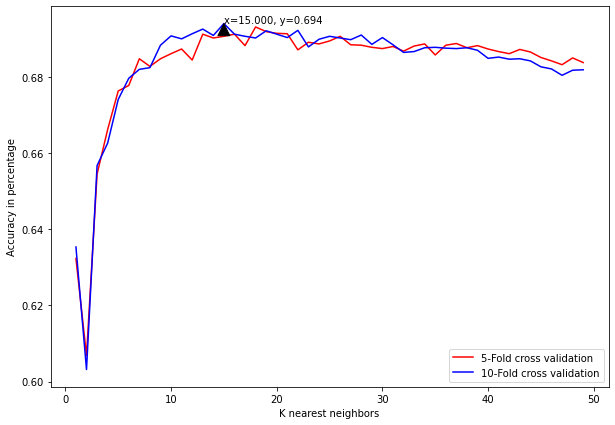

In [23]:
# Ova celija nam sluzi da vizuelno prikazemo najbolje parametre: vrednost za k i na koliko fold-ova cemo podeliti skup
# Zakljucak: 
# Dobili smo da je optimalno resenje k = 15 i 10-fold unakrsna validacija sa jaccard metrikom, 
# tako da cemo to i ubaciti u algoritam
plt.figure(figsize=(10, 7))
plt.plot(k_range, scores_cv5, 'r', label = '5-Fold cross validation')
plt.plot(k_range, scores_cv10, 'b',label = '10-Fold cross validation')

# sluzi da nadje vrednost x za koju je y najveci u 5-fold 
ymax_cv5 = max(scores_cv5)
xpos_cv5 = scores_cv5.index(ymax_cv5)
xmax_cv5 = k_range[xpos_cv5]

# sluzi da nadje vrednost x za koju je y najveci u 10-fold
ymax_cv10 = max(scores_cv10)
xpos_cv10 = scores_cv10.index(ymax_cv10)
xmax_cv10 = k_range[xpos_cv10]

# posto nam treba jedan par koordinata, a to je onaj par od najvece vrednosti, pravimo par (Xmax, Ymax)
# u odnosu na to koja y vrednost veca (za cv = 5 ili za cv = 10)
if ymax_cv5 > ymax_cv10:
    Xmax = xmax_cv5
    Ymax = ymax_cv5
else:
    Xmax = xmax_cv10
    Ymax = ymax_cv10

text= "x={:.3f}, y={:.3f}".format(Xmax, Ymax) # forma teksta koji ce se pokazati na grafiku   
plt.annotate(text, xy=(Xmax, Ymax), arrowprops=dict(facecolor='black', shrink=0.05)) # sluzi za anotaciju tacke na grafiku
# cije su zadate koordinate, u nasem slucaju Xmax i Ymax
plt.xlabel('K nearest neighbors')
plt.ylabel('Accuracy in percentage')
plt.legend()

##### Obucavanje i testiranje na trening skupu

D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


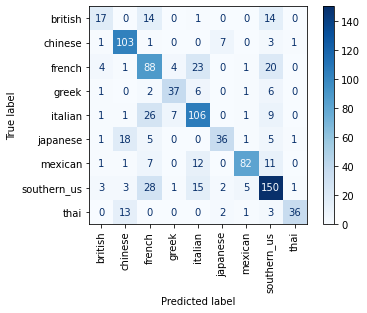

Accuracy = 0.6887486855941115


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


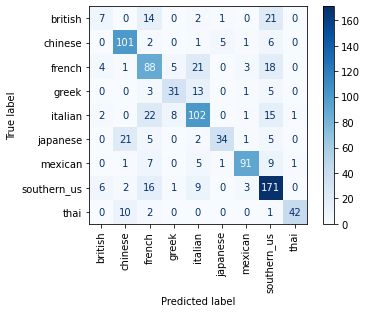

Accuracy = 0.7013669821240799


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


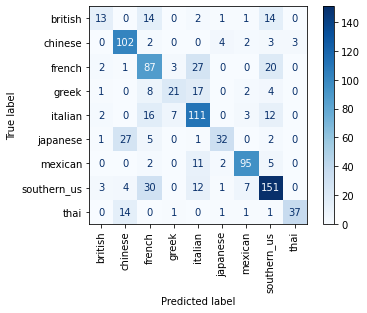

Accuracy = 0.6824395373291272


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


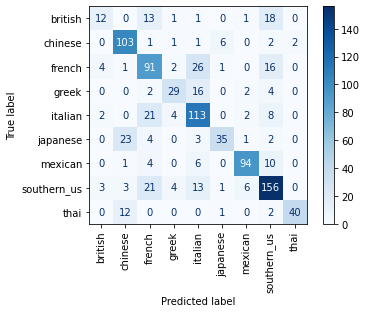

Accuracy = 0.7076761303890642


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


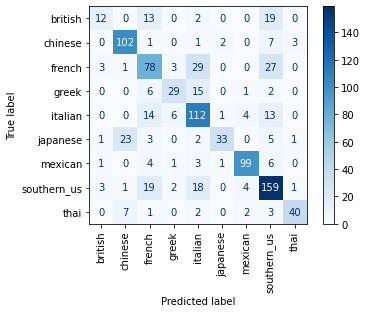

Accuracy = 0.6982124079915878


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


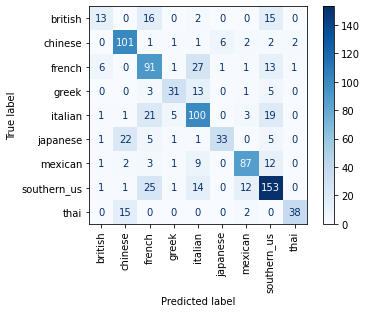

Accuracy = 0.6803364879074658


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


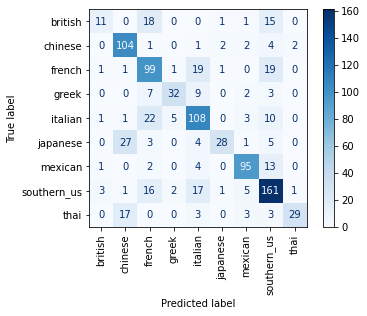

Accuracy = 0.7013669821240799


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


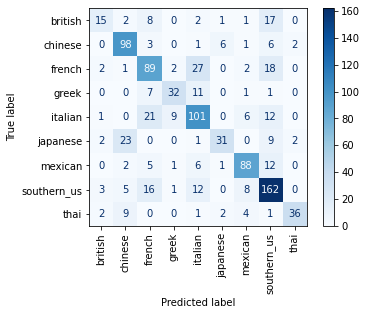

Accuracy = 0.6855941114616193


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


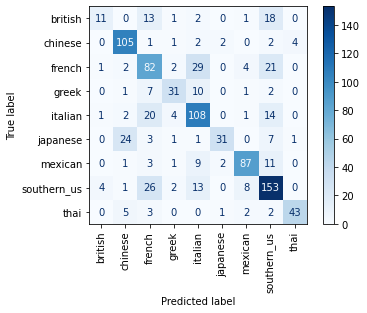

Accuracy = 0.6845425867507886


D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


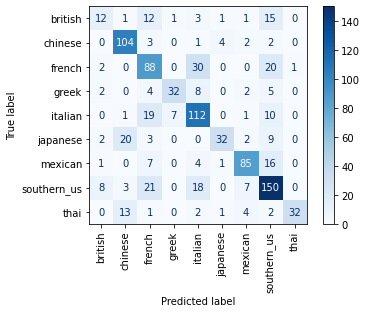

Accuracy = 0.6810526315789474
 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


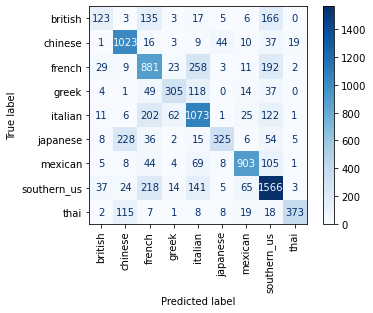

AVERAGE ACCURACY:  0.6911347144810179
 
british_TP:  123
british_TN:  8954
british_FN:  335
british_FP:  97
british precision:  0.5590909090909091
british accuracy:  0.9545693553475655
british sensitivity:  0.2685589519650655
british specificity:  0.9892829521599823
british F score:  0.36283185840707965
-----------------------------------------
chinese_TP:  1023
chinese_TN:  7953
chinese_FN:  139
chinese_FP:  394
chinese precision:  0.7219477769936485
chinese accuracy:  0.9439478388894731
chinese sensitivity:  0.8803786574870912
chinese specificity:  0.95279741224392
chinese F score:  0.7933307483520744
-----------------------------------------
french_TP:  881
french_TN:  7394
french_FN:  527
french_FP:  707
french precision:  0.5547858942065491
french accuracy:  0.870228204858555
french sensitivity:  0.6257102272727273
french specificity:  0.9127268238489076
french F score:  0.5881174899866488
-----------------------------------------
greek_TP:  305
greek_TN:  8869
greek_FN:  223
gree

In [24]:
# uzet 10-fold sa n_neighbors = 15, jer su to optimalni parametri i metrika je jaccard 
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # StratifiedKFold, osim sto particionise skup na onoliko foldova koliko zadamo,
# vodi racuna i o odnosu klasa u foldu (odrzava klasni odnos koji je bio i u originalnom delu).
indexes = kf.split(X_train, Y_train) # generise indexe na koje cemo podeliti skup na trening i test
fin_conf_mat = np.zeros((len(np.unique(Y_train)),len(np.unique(Y_train))))# formiramo finalnu matricu od nula koja je dimenzija NxN, gde je N broj klasa

# unakrsna validacija na trening skupu pocetno podeljenog skupa
# iteriranje kroz indexes gde train_index su indexi za treniranje, a test_index indexi za testiranje
for train_index, test_index in indexes: 
    X1_train = X_train.iloc[train_index,:]
    X1_test = X_train.iloc[test_index,:]
    Y1_train = Y_train.iloc[train_index]
    Y1_test = Y_train.iloc[test_index]

    classifier = KNeighborsClassifier(n_neighbors=15, metric='jaccard')# KNN klasifikator
    classifier.fit(X1_train, Y1_train) # obucavanje skupa na odbircima iz trening skupa
    
    y1_pred = classifier.predict(X1_test) # predikcije na test skupu
    conf_mat = confusion_matrix(Y1_test, y1_pred, labels=classifier.classes_) # T1_test su ground truth vrednosti dok su y1_pred one koje je dao klasifikator. 
                                                                              # A classifier.classes_ nam daje imena svih klasa.
    
    disp = ConfusionMatrixDisplay.from_predictions(y_true=Y1_test, y_pred=y1_pred, labels=classifier.classes_, cmap=plt.cm.Blues, xticks_rotation=90)   
#     disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
    plt.show()
    print("Accuracy = {}".format(accuracy_score(Y1_test, y1_pred)))
    fin_conf_mat += conf_mat

print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat)/sum(sum(fin_conf_mat)))
print(' ')
evaluation_classif(fin_conf_mat.astype('int'))

##### Testiranje na glavnom test skupu

D:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


--------------------------------TEST SET--------------------------------


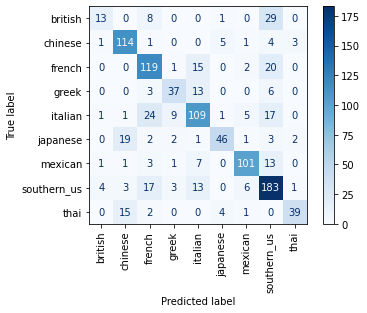

Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY):  0.7199621570482497
preciznost mikro:  0.7199621570482497
preciznost makro:  0.7389195281096492
osetljivost mikro:  0.7199621570482497
osetljivost makro:  0.667992568217405
f mera mikro:  0.7199621570482497
f mera makro:  0.6883027087591
 
['british' 'chinese' 'french' 'greek' 'italian' 'japanese' 'mexican'
 'southern_us' 'thai']
 
british_TP:  13
british_TN:  999
british_FN:  38
british_FP:  7
british precision:  0.65
british accuracy:  0.9574266792809839
british sensitivity:  0.2549019607843137
british specificity:  0.9930417495029821
british F score:  0.36619718309859156
-----------------------------------------
chinese_TP:  114
chinese_TN:  889
chinese_FN:  15
chinese_FP:  39
chinese precision:  0.7450980392156863
chinese accuracy:  0.9489120151371807
chinese sensitivity:  0.8837209302325582
chinese specificity:  0.9579741379310345
chinese F score:  0.8085106382978724
-----------------------------------------
french_TP:  11

In [44]:
classifier = KNeighborsClassifier(n_neighbors=15, metric='jaccard')
classifier.fit(X_train, Y_train)
    
y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(Y_test, y_pred, labels=classifier.classes_)

print('--------------------------------TEST SET--------------------------------')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()

print('Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY): ', accuracy_score(Y_test, y_pred))
print('preciznost mikro: ', precision_score(Y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(Y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(Y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(Y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(Y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(Y_test, y_pred, average='macro'))
print(' ')
print(classifier.classes_)
print(' ')
evaluation_classif(conf_mat)

# Random forest klasifikator sa unakrsnom validacijom

##### Podesavanje vrednosti u data setu za izvrsavanje algoritma

In [26]:
catg_list = X.dtypes[X.dtypes == "object"].index.tolist() 
X1=pd.DataFrame()
for catg in catg_list:
    X_temp = pd.get_dummies(X[catg], prefix=catg).iloc[:, :-1]
    X1 = pd.concat([X1, X_temp], axis=1)
num_list = X.dtypes[X.dtypes != "object"].index.tolist()
X1 = pd.concat([X1, X[num_list]], axis=1)
print(X1.columns)
print(X1.shape)

Index(['salt', 'oil', 'garlic', 'pepper', 'sugar', 'butter', 'sauce',
       'olive oil', 'onions', 'water',
       ...
       'broth', 'zucchini', 'mirin', 'tomato paste', 'chicken breasts',
       'peanut oil', 'yellow onion', 'fillets', 'lettuce', 'mayonaise'],
      dtype='object', length=150)
(10566, 150)


In [27]:
y1=y.copy()
# ['british', 'chinese', 'french', 'greek', 'italian', 'japanese', 'mexican', 'southern_us', 'thai']
y1.loc[y==y.unique()[8]]=0 # <-- british
y1.loc[y==y.unique()[6]]=1 # <-- chinese
y1.loc[y==y.unique()[1]]=2 # <-- french
y1.loc[y==y.unique()[2]]=3 # <-- greek
y1.loc[y==y.unique()[4]]=4 # <-- italian
y1.loc[y==y.unique()[5]]=5 # <-- japanese
y1.loc[y==y.unique()[3]]=6 # <-- mexican
y1.loc[y==y.unique()[0]]=7 # <-- southern_us
y1.loc[y==y.unique()[7]]=8 # <-- thai
y1 = y1.astype('int')

In [28]:
# #Delimo ponovo pocetni skup. Modifikovane su vrednosti po obelezjima i prebacene u numericke
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, test_size = 0.10, stratify=y1, random_state=46)

##### Trazenje optimalnih parametara

In [42]:
# # Za cv = 5

# parameters = {'n_estimators':[5, 10, 20, 50, 100], 'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 20, 50, 100],
#               'min_samples_split':[None, 0.01, 0.05], 'class_weight':(None, 'balanced'), 'bootstrap' : (True, False)}
# rf = RandomForestClassifier()
# clf_cv5=GridSearchCV(rf, parameters, cv=5) # u pitanju je StratifiedKFold
# clf_cv5.fit(X1_train, Y1_train)
# print(clf_cv5.best_score_)
# print(clf_cv5.best_params_)

In [30]:
# Optimalni parametri za clf_cv5
# 0.6949197140693564
# {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 0.01, 'n_estimators': 100}

In [31]:
# Za cv = 10

# parameters = {'n_estimators':[5, 10, 20, 50, 100], 'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 20, 50, 100],
#               'min_samples_split':[0.01, 0.05], 'class_weight':(None, 'balanced'), 'bootstrap' : (True, False)}
# rf = RandomForestClassifier()
# clf_cv10=GridSearchCV(rf, parameters, cv=10)
# clf_cv10.fit(X1_train, Y1_train)

# print(clf_cv10.best_score_)
# print(clf_cv10.best_params_)

In [32]:
# Optimalni parametri za clf_cv10
# 0.6941840721678012
# {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 0.01, 'n_estimators': 100}

##### Obucavanje i testiranje na trening skupu

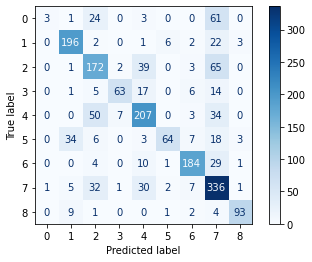

Accuracy = 0.6929547844374343


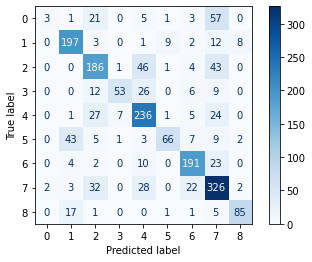

Accuracy = 0.7060988433228181


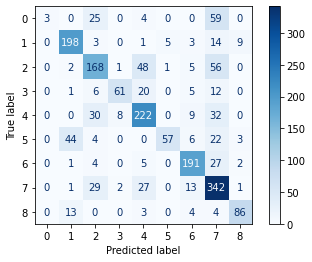

Accuracy = 0.6982124079915878


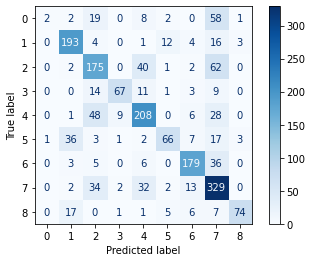

Accuracy = 0.6798107255520505


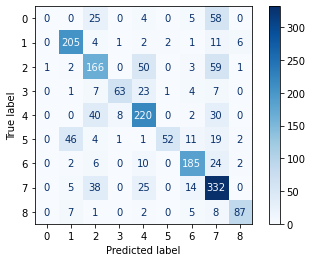

Accuracy = 0.6891109942135718
 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


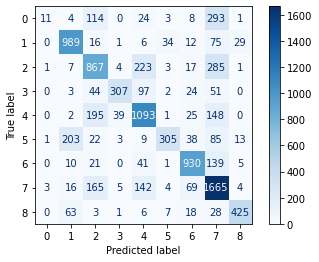

AVERAGE ACCURACY:  0.6932379850667788
 
british_TP:  11
british_TN:  9046
british_FN:  447
british_FP:  5
british precision:  0.6875
british accuracy:  0.9524660847618046
british sensitivity:  0.024017467248908297
british specificity:  0.9994475748536074
british F score:  0.046413502109704644
-----------------------------------------
chinese_TP:  989
chinese_TN:  8039
chinese_FN:  173
chinese_FP:  308
chinese precision:  0.7625289128758674
chinese accuracy:  0.9494163424124513
chinese sensitivity:  0.851118760757315
chinese specificity:  0.9631005151551456
chinese F score:  0.8043920292801952
-----------------------------------------
french_TP:  867
french_TN:  7521
french_FN:  541
french_FP:  580
french precision:  0.5991706979958535
french accuracy:  0.8821116836681039
french sensitivity:  0.6157670454545454
french specificity:  0.9284039007529935
french F score:  0.6073555166374781
-----------------------------------------
greek_TP:  307
greek_TN:  8928
greek_FN:  221
greek_FP:  53


In [33]:
# U algoritam su uneti optimalni parametri
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
indexes = kf.split(X1_train, Y1_train)
fin_conf_mat_rf = np.zeros((len(np.unique(Y1_train)),len(np.unique(Y1_train))))

for train_index, test_index in indexes:
    classifier = RandomForestClassifier(n_estimators=100, max_depth=50, bootstrap= False, class_weight = None, criterion= 'gini', min_samples_split = 0.01, random_state=42)
    classifier.fit(X1_train.iloc[train_index,:], Y1_train.iloc[train_index])
   
    Y_pred = classifier.predict(X1_train.iloc[test_index,:])
    conf_mat = confusion_matrix(Y1_train.iloc[test_index], Y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay.from_predictions(y_true=Y1_train.iloc[test_index], y_pred=Y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)   
    plt.show()
    print("Accuracy = {}".format(accuracy_score(Y1_train.iloc[test_index], Y_pred)))
    fin_conf_mat_rf += conf_mat
    
print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat_rf, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf)))
print(' ')
evaluation_classif(fin_conf_mat_rf.astype('int'))

##### Testiranje na glavnom test skupu

 
-----------------------------------------------------------------------------
-----------------------------------TEST SET----------------------------------


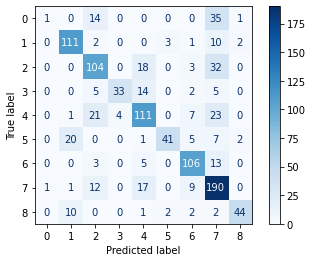

Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY):  0.7010406811731315
preciznost mikro:  0.7010406811731315
preciznost makro:  0.7391740957306445
osetljivost mikro:  0.7010406811731315
osetljivost makro:  0.6320004243995899
f mera mikro:  0.7010406811731315
f mera makro:  0.6484623151320251
 
[0 1 2 3 4 5 6 7 8]
 
british_TP:  1
british_TN:  1005
british_FN:  50
british_FP:  1
british precision:  0.5
british accuracy:  0.9517502365184485
british sensitivity:  0.0196078431372549
british specificity:  0.9990059642147118
british F score:  0.03773584905660377
-----------------------------------------
chinese_TP:  111
chinese_TN:  896
chinese_FN:  18
chinese_FP:  32
chinese precision:  0.7762237762237763
chinese accuracy:  0.9526963103122044
chinese sensitivity:  0.8604651162790697
chinese specificity:  0.9655172413793104
chinese F score:  0.8161764705882353
-----------------------------------------
french_TP:  104
french_TN:  843
french_FN:  53
french_FP:  57
french precision:  0.

In [46]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=50, bootstrap= False, class_weight = None, criterion= 'gini', min_samples_split = 0.01, random_state=42)
classifier.fit(X_train, Y1_train)

y_pred=classifier.predict(X_test)
conf_mat = confusion_matrix(Y1_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SET----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()

print('Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY): ', accuracy_score(Y1_test, y_pred))
print('preciznost mikro: ', precision_score(Y1_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(Y1_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(Y1_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(Y1_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(Y1_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(Y1_test, y_pred, average='macro'))
print(' ')
print(classifier.classes_)
print(' ')
evaluation_classif(conf_mat)

450


Text(0, 0.5, 'greška')

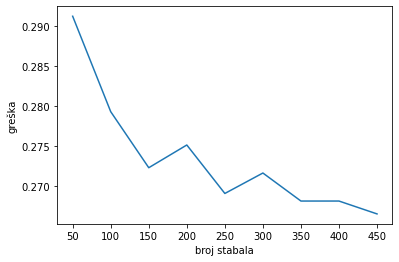

In [35]:
error_rate=[]
num_estimators = np.arange(50, 500, 50)
for i in num_estimators:
    classifier = RandomForestClassifier(n_estimators=i, max_depth=50,oob_score=True)
    classifier.fit(X, y)
    oob_error = 1 - classifier.oob_score_
    error_rate.append(oob_error)
tmp = error_rate.index(min(error_rate))
print(num_estimators[tmp])
plt.plot(np.arange(50,500,50), error_rate)
plt.xlabel('broj stabala')
plt.ylabel('greška')

 
-----------------------------------------------------------------------------
-----------------------------------TEST SET----------------------------------


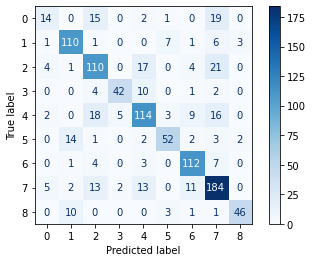

Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY):  0.7417218543046358
preciznost mikro:  0.7417218543046358
preciznost makro:  0.7508912783558737
osetljivost mikro:  0.7417218543046358
osetljivost makro:  0.7047286347734377
f mera mikro:  0.7417218543046359
f mera makro:  0.7204245279485983
 
[0 1 2 3 4 5 6 7 8]
 
british_TP:  14
british_TN:  994
british_FN:  37
british_FP:  12
british precision:  0.5384615384615384
british accuracy:  0.9536423841059603
british sensitivity:  0.27450980392156865
british specificity:  0.9880715705765407
british F score:  0.36363636363636365
-----------------------------------------
chinese_TP:  110
chinese_TN:  900
chinese_FN:  19
chinese_FP:  28
chinese precision:  0.7971014492753623
chinese accuracy:  0.9555345316934721
chinese sensitivity:  0.8527131782945736
chinese specificity:  0.9698275862068966
chinese F score:  0.8239700374531834
-----------------------------------------
french_TP:  110
french_TN:  844
french_FN:  47
french_FP:  56
fren

In [47]:
# Bez granice minimalnog broja uzoraka koji se treba naci u cvoru da bi se delilo dalje
classifier = RandomForestClassifier(n_estimators=50, max_depth=100, bootstrap= False, class_weight = None, criterion= 'gini', random_state=42)
classifier.fit(X_train, Y1_train)

y_pred=classifier.predict(X_test)
conf_mat = confusion_matrix(Y1_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SET----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()

print('Procenat pogodjenih uzoraka (dosadasnji AVERAGE ACCURACY): ', accuracy_score(Y1_test, y_pred))
print('preciznost mikro: ', precision_score(Y1_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(Y1_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(Y1_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(Y1_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(Y1_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(Y1_test, y_pred, average='macro'))
print(' ')
print(classifier.classes_)
print(' ')
evaluation_classif(conf_mat)